# Phenotype cluster visulization 

In [1]:
# sccimap_env4 environment 
from dask_image.imread import imread
from dask import delayed
import dask.array as da
from glob import glob
import napari
import numpy as np
import os
import pandas as pd
import PIL
from PIL import Image
from skimage.io import imread,imsave
from skimage import img_as_ubyte
from skimage.segmentation import find_boundaries
import time
import warnings
warnings.filterwarnings(action='ignore')
Image.MAX_IMAGE_PIXELS = None

def turnon(*args):
    for Ab in args:
        v.layers[f'{Ab}'].visible=True
    print('Turned On done')
def turnoff(*args):
    for Ab in args:
        v.layers[f'{Ab}'].visible=False
    print('Turned Off done')
def saveimg(name):
    image = v.screenshot()
    imsave(f'Analysis/new_July_2021/screenshot/{name}.png', image)
    
os.chdir ('/Users/kim/Data/CRUK-OHSU_onedrive final 2022-09-30/Manuscript/IMC-IF method paper/Cell_report_method_resource/github')

print('library loading done')

/Users/kim/opt/anaconda3/envs/scimap_env4/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


library loading done


In [2]:
# Image adjustment 
def imageadjust_IF(): 
    v.layers['DAPI'].colormap = 'blue'
    v.layers['DAPI'].contrast_limits = [17117, 54954]
    v.layers['DAPI'].gamma=1.0
    v.layers['DAPI'].opacity=0.83

    v.layers['Ecad'].colormap = 'red'
    v.layers['Ecad'].contrast_limits = [809, 10000]
    v.layers['Ecad'].gamma=0.7
    v.layers['Ecad'].opacity=1.0

    v.layers['CD45'].colormap = 'green'
    v.layers['CD45'].contrast_limits = [5000, 73873]
    v.layers['CD45'].gamma=1.0
    v.layers['CD45'].opacity=0.83

    v.layers['rDAPI'].colormap = 'blue'
    v.layers['rDAPI'].contrast_limits = [17117, 32661]
    v.layers['rDAPI'].gamma=0.7
    v.layers['rDAPI'].opacity=1.0

    v.layers['rEcad'].colormap = 'red'
    v.layers['rEcad'].contrast_limits = [809, 6347]
    v.layers['rEcad'].gamma=0.44
    v.layers['rEcad'].opacity=1.0 

    v.layers['rCD45'].colormap = 'green'
    v.layers['rCD45'].contrast_limits = [9359, 73873]
    v.layers['rCD45'].gamma=0.58
    v.layers['rCD45'].opacity=0.83

    v.layers['rDAPI'].colormap = 'blue'
    v.layers['rDAPI'].contrast_limits = [17117, 32661]
    v.layers['rDAPI'].gamma=0.7
    v.layers['rDAPI'].opacity=1.0

    v.layers['rEcad'].colormap = 'red'
    v.layers['rEcad'].contrast_limits = [809, 6347]
    v.layers['rEcad'].gamma=0.44
    v.layers['rEcad'].opacity=1.0 

    v.layers['rCD45'].colormap = 'green'
    v.layers['rCD45'].contrast_limits = [9359, 73873]
    v.layers['rCD45'].gamma=0.58
    v.layers['rCD45'].opacity=0.83

    v.layers['IMC_DNA'].colormap = 'blue'
    v.layers['IMC_DNA'].contrast_limits = [0, 100]
    v.layers['IMC_DNA'].gamma=0.32 
    v.layers['IMC_DNA'].opacity=0.3

    v.layers['IMC_Ecad'].colormap =  'magenta'
    v.layers['IMC_Ecad'].contrast_limits = [3, 100]
    v.layers['IMC_Ecad'].gamma=0.1
    v.layers['IMC_Ecad'].opacity=0.2
    print('done')

In [3]:
def imageadjust_IMC(): 
    #1. Epithelial cell 
    v.layers['panK'].colormap = colors[10]
    v.layers['panK'].contrast_limits = [0, 300]
    v.layers['panK'].gamma=0.4
    v.layers['panK'].opacity=0.1

    v.layers['CD45RO'].colormap = colors[40]
    v.layers['CD45RO'].contrast_limits = [9, 45]
    v.layers['CD45RO'].gamma=0.7
    v.layers['CD45RO'].opacity=1.0

    #2. proliferating-mutatation  
    v.layers['p53'].colormap = colors[0]
    v.layers['p53'].contrast_limits = [0.8, 202]
    v.layers['p53'].gamma=0.42
    v.layers['p53'].opacity=1.0 

    v.layers['Ki67'].colormap =  colors[49]  
    v.layers['Ki67'].contrast_limits = [4.5, 50]
    v.layers['Ki67'].gamma=0.2
    v.layers['Ki67'].opacity=1.0 

    # 3. Stromal -vascular cell  
    v.layers['Col1'].colormap = colors[8] 
    v.layers['Col1'].contrast_limits = [9, 76]
    v.layers['Col1'].gamma=2.0
    v.layers['Col1'].opacity=0.86

    v.layers['aSMA'].colormap = colors[7]
    v.layers['aSMA'].contrast_limits = [34.7,121]
    v.layers['aSMA'].gamma=1.04
    v.layers['aSMA'].opacity=0.26

    v.layers['CD31'].colormap = colors[1]
    v.layers['CD31'].contrast_limits = [2, 40.0]
    v.layers['CD31'].gamma=0.25
    v.layers['CD31'].opacity=0.94

    #4. Lymphoid Lineage  
    v.layers['CD3'].colormap = colors[37]
    v.layers['CD3'].contrast_limits = [5, 370]
    v.layers['CD3'].gamma=0.2
    v.layers['CD3'].opacity=1.0

    v.layers['CD4'].colormap = colors[30] 
    v.layers['CD4'].contrast_limits = [2.0, 27]
    v.layers['CD4'].gamma=0.464
    v.layers['CD4'].opacity=1.0

    v.layers['CCR3'].colormap = colors[27] 
    v.layers['CCR3'].contrast_limits = [0.0,103]
    v.layers['CCR3'].gamma=0.728
    v.layers['CCR3'].opacity=1.0

    v.layers['CCR7'].colormap = colors[45] 
    v.layers['CCR7'].contrast_limits = [0, 265]
    v.layers['CCR7'].gamma=2.0 
    v.layers['CCR7'].opacity=0.16 

    #5. T cell, Functioning Cell 
    v.layers['CD56'].colormap = colors[13] 
    v.layers['CD56'].contrast_limits = [15.7, 45.0]
    v.layers['CD56'].gamma=0.464
    v.layers['CD56'].opacity=0.97 

    v.layers['CD8a'].colormap = colors[9] 
    v.layers['CD8a'].contrast_limits = [2.5, 40.54]
    v.layers['CD8a'].gamma=1.088
    v.layers['CD8a'].opacity=1.0

    v.layers['GranB'].colormap = colors[42] 
    v.layers['GranB'].contrast_limits = [4.5, 112.0]
    v.layers['GranB'].gamma=0.2
    v.layers['GranB'].opacity=1.0

    #6. Lymphoid cells - regulatory or exausted 
    v.layers['ICOS'].colormap = colors[6] 
    v.layers['ICOS'].contrast_limits = [0.8, 95]
    v.layers['ICOS'].gamma=0.56
    v.layers['ICOS'].opacity=1.0

    v.layers['TIM3'].colormap = colors[11] 
    v.layers['TIM3'].contrast_limits = [1.7, 31.5]
    v.layers['TIM3'].gamma=0.608
    v.layers['TIM3'].opacity=0.5 

    v.layers['LAG3'].colormap = colors[18] 
    v.layers['LAG3'].contrast_limits = [0.8, 40.54]
    v.layers['LAG3'].gamma=0.44
    v.layers['LAG3'].opacity=0.5 

    v.layers['CTLA4'].colormap = colors[22] #    
    v.layers['CTLA4'].contrast_limits = [2.0, 19.0]
    v.layers['CTLA4'].gamma=0.42
    v.layers['CTLA4'].opacity=0.5 

    v.layers['Foxp3'].colormap = colors[24]  
    v.layers['Foxp3'].contrast_limits = [0.8, 112.6]
    v.layers['Foxp3'].gamma= 0.416

    v.layers['PD1'].colormap = colors[38]  
    v.layers['PD1'].contrast_limits = [1.7, 43.8]
    v.layers['PD1'].gamma=0.59

    v.layers['CD38'].colormap = colors[30] 
    v.layers['CD38'].contrast_limits = [2.5, 48.8]
    v.layers['CD38'].gamma=0.3
    v.layers['CD38'].opacity=0.5 

    #8 Myeloid- Neutrophil  
    v.layers['CD11b'].colormap = colors[5] 
    v.layers['CD11b'].contrast_limits = [6.6, 19.0]
    v.layers['CD11b'].gamma=1.23

    v.layers['CD16'].colormap =  colors[35] 
    v.layers['CD16'].contrast_limits = [2.0, 16.5]
    v.layers['CD16'].gamma=0.34

    v.layers['Tryptas'].colormap = colors[26] 
    v.layers['Tryptas'].contrast_limits = [0.0, 500.0]
    v.layers['Tryptas'].gamma=1.53
    v.layers['Tryptas'].opacity=0.3 

    #9 Myeloid Lineage - macrophage 
    v.layers['CD11c'].colormap =colors[2] 
    v.layers['CD11c'].contrast_limits = [5.0, 74.4]
    v.layers['CD11c'].gamma=0.49

    v.layers['CD14'].colormap = colors[46]  
    v.layers['CD14'].contrast_limits = [6, 279]
    v.layers['CD14'].gamma=0.32
    v.layers['CD14'].opacity=1.0

    v.layers['HLA-DR'].colormap = colors[48] 
    v.layers['HLA-DR'].contrast_limits = [5.0, 91.7]
    v.layers['HLA-DR'].gamma=0.49

    v.layers['CD68'].colormap = colors[44] 
    v.layers['CD68'].contrast_limits = [10.7, 162.0]
    v.layers['CD68'].gamma=0.776
    v.layers['CD68'].opacity=1.0

    v.layers['CD163'].colormap = colors[15]  
    v.layers['CD163'].contrast_limits = [1.0, 24.0]
    v.layers['CD163'].gamma=0.49

    v.layers['CSF1R'].colormap = colors[19]  
    v.layers['CSF1R'].contrast_limits = [10, 95.0]
    v.layers['CSF1R'].gamma=1.32 

    v.layers['CD206'].colormap = colors[33]  
    v.layers['CD206'].contrast_limits = [0.8, 33.9]
    v.layers['CD206'].gamma=0.44

    v.layers['CD1a'].colormap =colors[32]   
    v.layers['CD1a'].contrast_limits = [4.1, 23.1]
    v.layers['CD1a'].gamma=1.52

    #10 T cell inhibition : blue
    v.layers['PDL1'].colormap = colors[21]  
    v.layers['PDL1'].contrast_limits = [2.5, 29.8]
    v.layers['PDL1'].gamma=0.52

    v.layers['VISTA'].colormap = colors[29]  
    v.layers['VISTA'].contrast_limits = [3.0, 22.3]
    v.layers['VISTA'].gamma=0.52
    print('done')

In [4]:
def imageadjust_crop(): 
    # Image adjustment 
    v.layers['DAPI_crop'].colormap = 'blue'
    v.layers['DAPI_crop'].gamma = 0.76
    v.layers['DAPI_crop'].opacity = 0.87
    v.layers['DAPI_crop'].contrast_limits = [9217,54954]

    v.layers['Ecad_crop'].colormap = 'red'
    v.layers['Ecad_crop'].gamma = 0.85
    v.layers['Ecad_crop'].opacity = 1.00
    v.layers['Ecad_crop'].contrast_limits = [809,25004]

    # DAPI Ecad gray-red version 
    v.layers['DAPI_crop'].colormap = 'gray' 
    v.layers['DAPI_crop'].contrast_limits = [650.0, 100000.0] # 54954
    v.layers['DAPI_crop'].gamma= .728
    v.layers['DAPI_crop'].opacity=1.0 

    v.layers['Ecad_crop'].colormap = 'red' 
    v.layers['Ecad_crop'].contrast_limits = [809.0, 18486] 
    v.layers['Ecad_crop'].gamma=  0.728
    v.layers['Ecad_crop'].opacity=1.0 

    v.layers['IF_cell_b_crop'].colormap = 'green' 
    v.layers['IF_nuc_b_crop'].opacity = 0.55
    v.layers['IF_cell_b_crop'].opacity = 0.55 

### Sample select

In [5]:
files=sorted(glob('Analysis/new_July_2021/maskmerge_mesmer_0325/*'))
names=[file.split('/')[-1].replace('.tiff','') for file in files]
n=3
name=names[n]
pt=name.split('.')[0]
print('sample name:', name) 

sample name: PS15.19650-B3


### Image loading 

In [6]:
# original images
IF = imread(f'Analysis/new_July_2021/CZItoTiff/IF/{name}.czi.tif')
DAPI=IF[:,:,0]
Ecad=IF[:,:,1] 
CD45=IF[:,:,2]
print('original IF image size: ', DAPI.shape)

original IF image size:  (42517, 20448)


In [7]:
# resized IF images    
rDAPI = imread(glob(f'Data/IMC EMR (1)/*{name}*/resized_IF/*{name}*_DAPI.tif')[0]) 
rEcad = imread(glob(f'Data/IMC EMR (1)/*{name}*/resized_IF/*{name}*_Ecad.tif')[0]) 
rCD45 = imread(glob(f'Data/IMC EMR (1)/*{name}*/resized_IF/*{name}*_CD45.tif')[0]) 
print('resized IF image size: ', rDAPI.shape)

resized IF image size:  (13819, 6646)


In [8]:
# Registered IMC images 
IMC_DNA = imread(glob(f'Analysis/new_July_2021/IMC_Registration/*{name}*/*191_DNA*')[0])
IMC_Ecad = imread(glob(f'Analysis/new_July_2021/IMC_Registration/*{name}*/*E-Ca*')[0])
print('registered IMC image size: ', IMC_DNA.shape)

registered IMC image size:  (13819, 6646)


In [9]:
# Original IF size nuc/cell mask  : IF_cell_b / IF_nuc_b 

IF_mesmer_org =  imread(f'Analysis/new_July_2021/maskmerge_mesmer_org/{name}.tiff') 
IF_cell_b = img_as_ubyte(find_boundaries(IF_mesmer_org))

IF_nuc_org= imread(f'Analysis/new_July_2021/maskmerge_mesmer_nuc_org/{name}.tiff') 
IF_rim = np.where(IF_nuc_org != 0, 0, IF_mesmer_org)
IF_nuc_final = np.where(IF_rim !=0, 0, IF_mesmer_org)
IF_nuc_b=  img_as_ubyte(find_boundaries(IF_nuc_final))

# Resized IF mesmer mask  : IF_cell_0325_b / IF_nuc_0325_b 
IF_mesmer = imread(f'Analysis/new_July_2021/maskmerge_mesmer_0325/{name}.tiff') 
IF_cell_0325_b = img_as_ubyte(find_boundaries(IF_mesmer))

IF_nuc_0325= imread(f'Analysis/new_July_2021/maskmerge_mesmer_nuc_0325/{name}.tiff') 
IF_nuc_0325_b=  img_as_ubyte(find_boundaries(IF_nuc_0325))

# IMC nuc/cell mask  : IMC_cell_b / IMC_nuc_b 
IMC_cell = imread(f'Analysis/new_July_2021/IMC_mesmer/{pt}.tiff') 
IMC_cell_b = img_as_ubyte(find_boundaries(IMC_cell))

IMC_nuc = imread(f'Analysis/new_July_2021/IMC_mesmer_nuc/{pt}.tiff')
IMC_rim = np.where(IMC_nuc != 0, 0, IMC_cell) # rim (cell- nuc) 
IMC_nuc_final = np.where(IMC_rim !=0, 0, IMC_cell)
IMC_nuc_b = img_as_ubyte(find_boundaries(IMC_nuc_final))

print('done')

done


### Napari visualization 

In [10]:
v = napari.Viewer() 

### Original IF, resized IF, Registered IMC loading 

In [11]:
v.add_image(DAPI, name='DAPI',colormap='blue',blending='additive',visible=False);
v.add_image(Ecad, name='Ecad',colormap='yellow',blending='additive',visible=False);
v.add_image(CD45, name='CD45',colormap='green',blending='additive',visible=False);

v.add_image(rDAPI, name='rDAPI',blending='additive',visible=False);
v.add_image(rEcad, name='rEcad',blending='additive',visible=False);
v.add_image(rCD45, name='rCD45',blending='additive',visible=False);

v.add_image(IMC_DNA, name='IMC_DNA',blending='additive',visible=False );
v.add_image(IMC_Ecad, name='IMC_Ecad',blending='additive',visible=False )

<Image layer 'IMC_Ecad' at 0x7fa31abe2fd0>

### Nuclear/Cell mask loading

In [12]:
v.add_image(IF_cell_0325_b, name='IF_cell_0325_b',blending='additive',visible=False, colormap = 'yellow');
v.add_image(IF_nuc_0325_b, name='IF_nuc_0325_b',blending='additive',visible=False,colormap = 'green' );

v.add_image(IMC_cell_b, name='IMC_cell_b',blending='additive',visible=False, colormap = 'cyan');
v.add_image(IMC_nuc_b, name='IMC_nuc_b',blending='additive',visible=False, colormap = 'gray');

print('done') 

done


### IMC 36 antibody visualization with 36 colors 

In [13]:
img_fn=f'Analysis/new_July_2021/IMC_Registration/*{name}*/*.tiff'
fn= glob(img_fn)
abname = [i.split('/')[-1].split('_')[-1].strip('.ome.tiff') for i in (glob(img_fn))] # Ab name 

In [14]:
# Sanity check 
filenames = (glob(img_fn))
sample = imread(filenames[0])

lazy_imread = delayed(imread)  # lazy reader
lazy_arrays = [lazy_imread(fn) for fn in filenames]
dask_arrays = [
    da.from_delayed(delayed_reader, shape=sample.shape, dtype=sample.dtype)
    for delayed_reader in lazy_arrays
]
# Stack into one large dask.array
stack = da.stack(dask_arrays, axis=0)
stack.shape  # (nfiles, nz, ny, nx)
stack

dask.array<stack, shape=(47, 13819, 6646), dtype=uint16, chunksize=(1, 13819, 6646), chunktype=numpy.ndarray>

In [15]:
%time
# Load using dask_image
img = imread(img_fn)

v.add_image(img, 
            channel_axis=0,
            name=abname,
            visible=True, # If True, napari will load all images into view at once
            multiscale=False, # If True, napari will compute the pyramid of your image
            contrast_limits=[0, 500])

remove=['131X', '138Ba' ,'DNA', '134X', '208Pb','133Cs',  'DNA [1]', '80ArAr',   '127I', '140C', 'CD14 [1]','E-Cad', ] 

for r in remove: 
    v.layers.remove(r) 
print('done')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
done


CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs


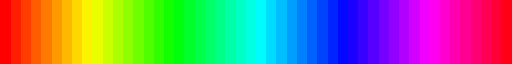

In [17]:
%time
# arrange colorset 
from matplotlib import cm
hsv_new = cm.get_cmap('hsv', 50)
hc= hsv_new(range(50))
colors= [tuple(c) for c in hc ]
# random.shuffle(colors)
hsv_new

In [18]:
imageadjust_IMC()

done


In [19]:
allimg= list(map(str, v.layers))
turnoff(*allimg)

Turned Off done


In [20]:
turnon(*allimg)

Turned On done


In [21]:
turnoff(*allimg)

Turned Off done


### IMC 36 antibodies turnon 

In [22]:
orgIF = ['DAPI','Ecad','CD45']
rIF = ['rDAPI','rCD45','rEcad']
rIMC = ['IMC_DNA','IMC_Ecad']
masks = ['IF_nuc_b','IF_cell_b','IMC_nuc_b','IMC_cell_b'] 
IMC = [x for x in abname if x not in remove]


IMCist=['Foxp3', 'CD16', 'CD8a', 'p53', 'CD163', 'CD11b', 
        'CD206', 'CD4', 'Col1', 'CD11c', 'GranB', 'CD20', 'CD68', 'PD1', 
        'Tryptas', 'TIM3', 'panK', 'CCR7', 'Ki67', 'aSMA', 'CD45RO', 'HLA-DR', 'CD3', 'CD31',
        'CTLA4', 'CD56', 'CCR3', 'VISTA', 'CD38', 'LAG3', 'CD14', 'CD1a', 'PDL1', 'ICOS', 'CSF1R']
turnon(*IMCist)

Turned On done


### Registered HE overlay

In [23]:
if n!=4:
    rHE = imread(glob(f'Data/IMC EMR (1)/*{name}*/registered_HE/*{name}*')[0]) 
    print('registered HE size:', rHE.shape)
else: 
    rHE = np.zeros(rDAPI.shape)
    print('registered HE size:', rHE.shape)
print('HE loading done')

v.add_image(rHE, name='rHE',blending='additive',visible=True, opacity=0.3);

registered HE size: (13819, 6646, 3)
HE loading done


# Figure 2A Whole area visualization with registration 

In [28]:
allimg= list(map(str, v.layers))
turnoff(*allimg)

Turned Off done


In [29]:
turnon (*rIF)

Turned On done


In [30]:
imageadjust_IF()

done


In [31]:
turnon (*IMCist)

Turned On done


In [32]:
imageadjust_IMC()

done


In [33]:
turnon ('rHE')
v.layers['rHE'].opacity =0.5

Turned On done


In [34]:
saveimg('overlay')

# Figure 5A Cropped original IF images

In [35]:
# Shape Mask Crop
v.layers['Shapes'].save('file.csv')

df=pd.read_csv('file.csv')
x1=int(np.round(df.loc[df['vertex-index']==0, 'axis-0'].values))
x2=int(np.round(df.loc[df['vertex-index']==3, 'axis-0'].values))
y1=int(np.round(df.loc[df['vertex-index']==3, 'axis-1'].values))
y2=int(np.round(df.loc[df['vertex-index']==2, 'axis-1'].values))

print(x1,x2,y1,y2)

3792 7722 2620 6000


In [36]:
ratio_x=DAPI.shape[0]/rDAPI.shape[0]

X1 = int(np.round(x1 * ratio_x))
X2 = int(np.round(x2 * ratio_x))
Y1 = int(np.round(y1 * ratio_x))
Y2 = int(np.round(y2 * ratio_x))

print(X1,X2,Y1,Y2)

11667 23758 8061 18460


In [37]:
### Shape Mask Crop for IF images (larger)
v.add_image(DAPI[X1:X2,Y1:Y2], name= 'DAPI_crop',blending='additive')
v.add_image(Ecad[X1:X2,Y1:Y2], name= 'Ecad_crop',blending='additive')

v.add_image(IF_nuc_b[X1:X2,Y1:Y2], name='IF_nuc_b_crop',blending='additive',visible=False );
v.add_image(IF_cell_b[X1:X2,Y1:Y2], name='IF_cell_b_crop',blending='additive',visible=False );

### IMC image enlargment  

In [38]:
img_IMC_DNA= Image.fromarray(IMC_DNA[x1:x2,y1:y2] )
img_IMC_DNA =img_IMC_DNA.resize(size=(IF_mesmer_org[X1:X2,Y1:Y2].shape[1],IF_mesmer_org[X1:X2,Y1:Y2].shape[0]),resample=PIL.Image.NEAREST)
img_IMC_DNA = np.array(img_IMC_DNA)
v.add_image(img_IMC_DNA, name= 'IMC_img_large_DNA',blending='additive',visible=False, colormap ='gray' )
v.layers['IMC_img_large_DNA'].gamma = 0.63
v.layers['IMC_img_large_DNA'].opacity = 1.00
v.layers['IMC_img_large_DNA'].contrast_limits = [0,100]

In [39]:
img_IMC_Ecad= Image.fromarray(IMC_Ecad[x1:x2,y1:y2] )
img_IMC_Ecad =img_IMC_Ecad.resize(size=(IF_mesmer_org[X1:X2,Y1:Y2].shape[1],IF_mesmer_org[X1:X2,Y1:Y2].shape[0]),resample=PIL.Image.NEAREST)
img_IMC_Ecad = np.array(img_IMC_Ecad)
v.add_image(img_IMC_Ecad, name= 'IMC_img_large_Ecad',blending='additive',visible=False, colormap ='red' )
v.layers['IMC_img_large_Ecad'].gamma =  0.464
v.layers['IMC_img_large_Ecad'].opacity = 1.00
v.layers['IMC_img_large_Ecad'].contrast_limits =  [0.0, 36.93693693693694] # DE18 [0.0, 99] 
print('done')

done


In [40]:
imageadjust_crop()    
print('done')

done


### IMC mask enlargment for thin boundary lines

In [41]:
# Cell mask enlargement
img = Image.fromarray(IMC_cell[x1:x2,y1:y2] )
IMC_mask_large =img.resize(size=(IF_mesmer_org[X1:X2,Y1:Y2].shape[1],IF_mesmer_org[X1:X2,Y1:Y2].shape[0]),resample=PIL.Image.NEAREST)
IMC_mask_large = np.array(IMC_mask_large)
IMC_mask_large_b = img_as_ubyte(find_boundaries(IMC_mask_large))

v.add_image(IMC_mask_large_b, name= 'IMC_mask_large_cell_b',blending='additive',visible=False, colormap ='green' )
v.layers['IMC_mask_large_cell_b'].opacity = 0.55

# nuclear mask enlargment
img_nuc = Image.fromarray(IMC_nuc[x1:x2,y1:y2] )
IMC_mask_nuc_large =img_nuc.resize(size=(IF_mesmer_org[X1:X2,Y1:Y2].shape[1],IF_mesmer_org[X1:X2,Y1:Y2].shape[0]),resample=PIL.Image.NEAREST)
IMC_mask_nuc_large = np.array(IMC_mask_nuc_large)
IMC_mask_nuc_large_b = img_as_ubyte(find_boundaries(IMC_mask_nuc_large))

v.add_image(IMC_mask_nuc_large_b, name= 'IMC_mask_large_nuc_b',blending='additive',visible=False, colormap ='gray' )
v.layers['IMC_mask_large_nuc_b'].opacity = 0.55

print('done')

done


In [42]:
# IF cropped mask image adjustment 

v.layers['IF_cell_b_crop'].opacity=0.45 
v.layers['IF_cell_b_crop'].colormap='green'

v.layers['IMC_mask_large_cell_b'].opacity=0.52 
v.layers['IMC_mask_large_cell_b'].colormap='green'


In [43]:
allimg= list(map(str, v.layers))
turnoff(*allimg)

Turned Off done


In [44]:
IFseries = ['DAPI_crop', 'Ecad_crop', 'IF_nuc_b_crop', 'IF_cell_b_crop' ]
turnon(*IFseries)

Turned On done


In [45]:
allimg= list(map(str, v.layers))
turnoff(*allimg)

Turned Off done


In [46]:
IMCseries = ['IMC_img_large_DNA', 'IMC_img_large_Ecad', 'IMC_mask_large_cell_b', 'IMC_mask_large_nuc_b' ]
turnon(*IMCseries)

Turned On done


# Supplementary Figure S3 : mask overlay ( cell masks only) 

In [47]:
allimg= list(map(str, v.layers))
turnoff(*allimg)

maskoverlay = ['DAPI_crop', 'Ecad_crop', 'IF_cell_b_crop',  'IMC_mask_large_cell_b' ]
turnon(*maskoverlay)

v.layers['IF_cell_b_crop'].opacity=0.45 
v.layers['IF_cell_b_crop'].colormap='yellow'

v.layers['IMC_mask_large_cell_b'].opacity=0.52 
v.layers['IMC_mask_large_cell_b'].colormap='cyan'

Turned Off done
Turned On done


# Figure 7B 

In [48]:
allimg= list(map(str, v.layers))
turnoff(*allimg)

Turned Off done


In [49]:
turnon(*IMCist)

Turned On done


In [50]:
#Loading Read mean intensity and cluster information 

df=pd.read_csv(f'Analysis/new_July_2021/cluster/cluster_{name}.csv')
df.head(3)

,Unnamed: 0,index,cell_id,area_cell,centroid_X,centroid_Y,eccentricity_cell,axis_major_length,axis_minor_length,area_nuc,...,Col1_z,CD3_z,Tryptase_z,CCR7_z,CD45RO_z,TIM3_z,CD56_z,CD11c_z,index.1,clusters
0,0,113781,94966.0,94,3238.702128,10178.414894,0.962955,21.819693,5.883941,83,...,3.310328,-0.652746,0.320686,-2.839123,-1.135023,-1.234902,-1.529230,-0.723512,0,1
1,1,113782,95031.0,23,3236.173913,10195.956522,0.866027,7.690033,3.844997,19,...,2.595724,-0.738860,0.593438,-2.383502,-1.343229,-1.339217,-1.414037,-0.899600,1,1
2,2,113783,95032.0,8,3247.375000,10196.625000,0.942232,5.321869,1.782613,3,...,1.527364,-0.738860,0.255277,-2.817953,-1.429447,-0.849131,-1.457540,-0.980357,2,1


In [51]:
### Select cluster 

i = 10 
IF_id_list=df[(df['clusters']==i) & (df['type']=='IF')].cell_id.to_list()
IMC_id_list=df[(df['clusters']==i) & (df['type']=='IMC')].cell_id.to_list()
print(f'number of cells in cluster {i} in IF', len(IF_id_list))
print(f'number of cells in cluster {i} in IMC', len(IMC_id_list))

number of cells in cluster 10 in IF 3040
number of cells in cluster 10 in IMC 1651


### Visulization cluster in cell mask  

In [52]:
%time

# Resized, registered IF/IMC nuc/cell mask 
IF_cell = imread(f'Analysis/new_July_2021/maskmerge_mesmer_0325/{name}.tiff') 

IF_sel =  IF_cell * np.isin(IF_cell, IF_id_list) 
IMC_sel =  IMC_cell * np.isin(IMC_cell, IMC_id_list) 

v.add_image(IF_sel , name='IF_sel',blending='additive',visible=True, colormap = 'cyan');
v.add_image(IMC_sel , name='IMC_sel',blending='additive',visible=True, colormap = 'green');

print('done')

CPU times: user 2 µs, sys: 7 µs, total: 9 µs
Wall time: 26 µs
done


### Express relevant IMC antibodies 

In [54]:
# Figure 7 DE18, Cluster #5  
allimg= list(map(str, v.layers))
turnoff(*allimg)
turnon('Foxp3','panK', 'CD1a', 'CCR7')

v.layers['CD1a'].colormap = 'yellow'  
v.layers['CD1a'].contrast_limits = [4.1, 126.12612612612611]
v.layers['CD1a'].gamma=0.272

v.layers['CCR7'].colormap = 'red'  
v.layers['CCR7'].contrast_limits = [4.1, 500.0]
v.layers['CCR7'].gamma=0.392

v.layers['Foxp3'].colormap = 'cyan'  
v.layers['Foxp3'].contrast_limits = [0.0, 49.54954954954955]
v.layers['Foxp3'].gamma=0.368

v.layers['panK'].contrast_limits = [0, 300]
v.layers['panK'].gamma=0.2
v.layers['panK'].opacity=0.1 

Turned Off done
Turned On done


# Figure 3A Disease status mask overlay 

In [55]:
%time
names = ['DE18.NE', 'DE28.NE.A', 'PS14.24197-1E', 'PS15.19650-B3', 'PS16.38634-F2']

if (name == 'DE18.NE')|(name == 'DE28.NE.A') : 
    mask_ne = imread(glob(f'Data/IMC EMR (1)/*{name}*/5. Area mask/*_NE_Mask.tif')[0])
    v.add_image(mask_ne, name='mask_ne',blending='additive',colormap='cyan', opacity=0.3,visible=False);

elif (name== 'PS14.24197-1E')| ( name == 'PS15.19650-B3') : 
    mask_imc = imread(glob(f'Data/IMC EMR (1)/*{name}*/5. Area mask/*_IMC_Mask.tif')[0])
    mask_dys = imread(glob(f'Data/IMC EMR (1)/*{name}*/5. Area mask/*_Dys_Mask.tif')[0])
    mask_nondys = imread(glob(f'Data/IMC EMR (1)/*{name}*/5. Area mask/*_NonDys_Mask.tif')[0]) 
        
    v.add_image(mask_imc, name='mask_imc',blending='additive',visible=False);
    v.add_image(mask_dys, name='mask_dys',blending='additive',visible=False);
    v.add_image(mask_nondys, name='mask_nondys',blending='additive',visible=False);    
    
elif name ==  'PS16.38634-F2' : 
    mask_nondys = imread(glob(f'Data/IMC EMR (1)/*{name}*/5. Area mask/*_NonDys_Mask.tif')[0])  
    v.add_image(mask_nondys, name='mask_nondys',blending='additive',visible=False); 

print('done')

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs
done


# Figure 3B Freehand Disease status ROI mask cropping  

In [56]:
mask_nondys.shape

(13819, 6646, 3)

In [57]:
mask_ne = np.zeros(mask_nondys.shape) 

mask_ne = np.where (mask_ne[:,:,1] !=0, 0, mask_ne[:,:,0])
mask_nondys = np.where (mask_nondys[:,:,1] !=0, 0, mask_nondys[:,:,0])
mask_dys = np.where (mask_dys[:,:,1] !=0, 0, mask_dys[:,:,0])
mask_imc = np.where (mask_imc[:,:,1] !=0, 0, mask_imc[:,:,0]) 

img = imread(img_fn) 
img_nondys = np.array([np.where(mask_nondys>0,im,0) for im in img])
img_dys= np.array([np.where(mask_dys>0,im,0) for im in img])
img_imc= np.array([np.where(mask_imc>0,im,0) for im in img])
print('done')

done


In [58]:
allimg= list(map(str, v.layers))
turnoff(*allimg)

Turned Off done


### nondys freehand ROI mask with IMC images 

In [59]:
v.add_image(img_nondys, 
            channel_axis=0,
            name=abname,
            visible=True, # If True, napari will load all images into view at once
            multiscale=False, # If True, napari will compute the pyramid of your image
            contrast_limits=[0, 500])
remove=['131X', '138Ba' ,'DNA', '134X', '208Pb','133Cs',  'DNA [1]', '80ArAr',   '127I', '140C', 'CD14 [1]','E-Cad', ] 
for r in remove: 
    v.layers.remove(r) 
imageadjust_IMC()
print('done')

done
done


### dys freehand ROI mask with IMC images 

In [61]:

v.add_image(img_dys, 
            channel_axis=0,
            name=abname,
            visible=True, # If True, napari will load all images into view at once
            multiscale=False, # If True, napari will compute the pyramid of your image
            contrast_limits=[0, 500])
remove=['131X', '138Ba' ,'DNA', '134X', '208Pb','133Cs',  'DNA [1]', '80ArAr',   '127I', '140C', 'CD14 [1]','E-Cad', ] 
for r in remove: 
    v.layers.remove(r) 

imageadjust_IMC()
print('done')

done
done


### IMC freehand ROI mask with IMC images 

In [62]:
v.add_image(img_imc, 
            channel_axis=0,
            name=abname,
            visible=True, # If True, napari will load all images into view at once
            multiscale=False, # If True, napari will compute the pyramid of your image
            contrast_limits=[0, 500])
remove=['131X', '138Ba' ,'DNA', '134X', '208Pb','133Cs',  'DNA [1]', '80ArAr',   '127I', '140C', 'CD14 [1]','E-Cad', ] 
for r in remove: 
    v.layers.remove(r) 
imageadjust_IMC()
print('done')

done
done
